In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 126MB/s]


In [ ]:
df=pd.read_csv('churn_logistic.csv')

In [ ]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

In [ ]:
df['Phone'].value_counts()

330-2635    14
360-1171    13
394-8402    12
328-7833    12
387-1116    11
            ..
392-4929     1
389-2631     1
368-3808     1
406-8599     1
400-4344     1
Name: Phone, Length: 3333, dtype: int64

In [ ]:
def find(x):
  a=x.split('-')[0]
  b=x.split('-')[1]
  return a+b
df['Phone']=df['Phone'].apply(find)

In [ ]:
df['Phone'].value_counts()

3302635    14
3601171    13
3948402    12
3287833    12
3871116    11
           ..
3924929     1
3892631     1
3683808     1
4068599     1
4004344     1
Name: Phone, Length: 3333, dtype: int64

In [ ]:
df.loc[~df['Phone'].str.isdigit()]

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn


In [ ]:
df['Phone']=df['Phone'].astype('int64')

<ipython-input-11-568986b3ca32>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'),annot=True)


<Axes: >

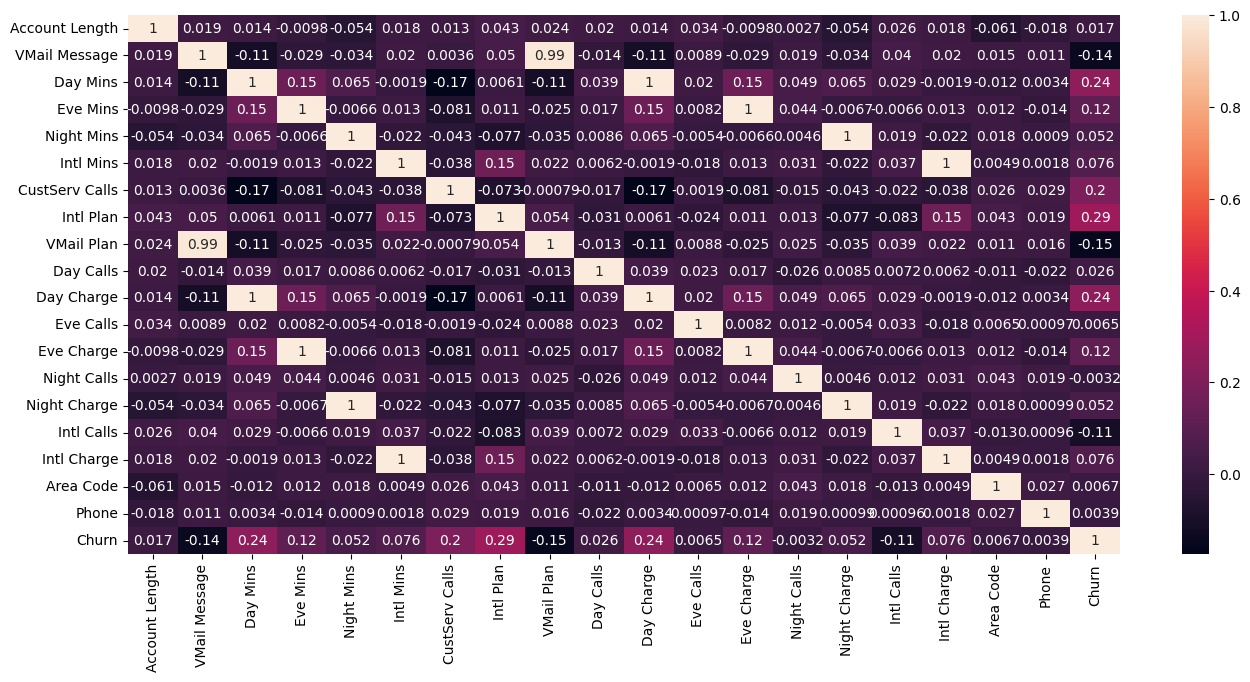

In [ ]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(method='spearman'),annot=True)

<Axes: xlabel='Churn', ylabel='CustServ Calls'>

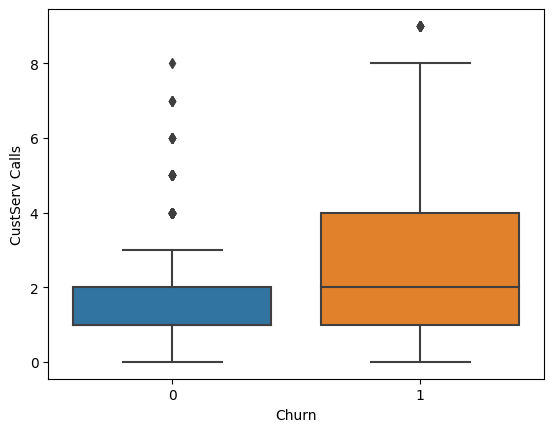

In [ ]:
#day charge,intl plan,cust service call,day mins and eve charge are correlated churn
sns.boxplot(y=df['CustServ Calls'],x=df['Churn'])

<Axes: xlabel='Churn', ylabel='Day Mins'>

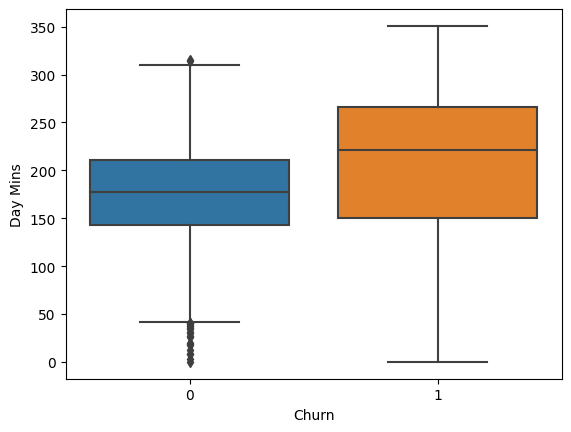

In [ ]:
sns.boxplot(y=df['Day Mins'],x=df['Churn'])

<Axes: xlabel='Churn', ylabel='Day Charge'>

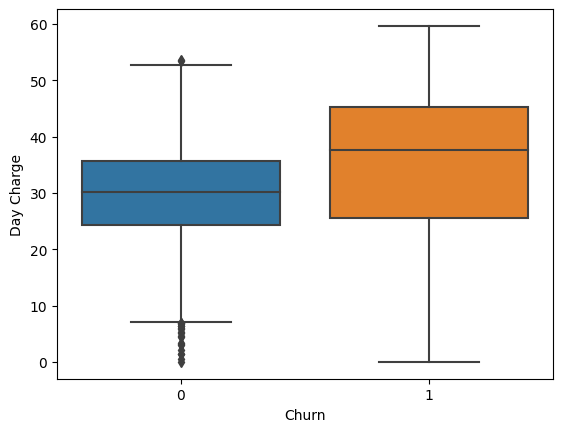

In [ ]:
sns.boxplot(y=df['Day Charge'],x=df['Churn'])

In [ ]:
from scipy import stats
stats.chi2_contingency(pd.crosstab(df['State'],df['Churn']))

Chi2ContingencyResult(statistic=291.19105715780813, pvalue=9.312194846627472e-36, dof=50, expected_freq=array([[32. , 32. ],
       [61. , 61. ],
       [61. , 61. ],
       [42. , 42. ],
       [39. , 39. ],
       [48. , 48. ],
       [63.5, 63.5],
       [40.5, 40.5],
       [50.5, 50.5],
       [52.5, 52.5],
       [48.5, 48.5],
       [34. , 34. ],
       [31.5, 31.5],
       [56. , 56. ],
       [43.5, 43.5],
       [56.5, 56.5],
       [71.5, 71.5],
       [49. , 49. ],
       [36. , 36. ],
       [59.5, 59.5],
       [74.5, 74.5],
       [62. , 62. ],
       [75.5, 75.5],
       [77.5, 77.5],
       [51. , 51. ],
       [64.5, 64.5],
       [64. , 64. ],
       [64.5, 64.5],
       [44. , 44. ],
       [44.5, 44.5],
       [46. , 46. ],
       [77.5, 77.5],
       [45.5, 45.5],
       [68.5, 68.5],
       [84. , 84. ],
       [64. , 64. ],
       [53.5, 53.5],
       [71. , 71. ],
       [43.5, 43.5],
       [45. , 45. ],
       [60.5, 60.5],
       [47.5, 47.5],
       [36.5, 

In [ ]:
#churn is dependent on state
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
from category_encoders import *
te=TargetEncoder()
df['State']=te.fit_transform(df['State'],df['Churn'])# 50 states

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('Churn',axis=1)
Y=df['Churn']

In [ ]:
X_dev,X_test,Y_dev,Y_test=train_test_split(X,Y,test_size=0.2)
X_train,X_cv,Y_train,Y_cv=train_test_split(X_dev,Y_dev,test_size=0.25)

In [ ]:
X_train.shape

(3420, 20)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_cv=pd.DataFrame(scaler.fit_transform(X_cv),columns=X_cv.columns)
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[ 0.02403663,  0.41026991,  0.41181486,  0.16562392,  0.12119758,
         0.06319341,  1.02563752,  0.90686847, -0.80500117,  0.02158082,
         0.41064555, -0.0110677 ,  0.13481348, -0.05206475,  0.11567158,
        -0.14458657,  0.17835262,  0.42092403,  0.02531717,  0.00390698]])

In [ ]:
train_score=[]
cv_score=[]
scaler = StandardScaler()
for la in np.arange(0.01,1200,100):
  model=LogisticRegression(C=1/la)
  model.fit(X_train,Y_train)
  train_score.append(model.score(X_train,Y_train))
  cv_score.append(model.score(X_cv,Y_cv))

<Axes: >

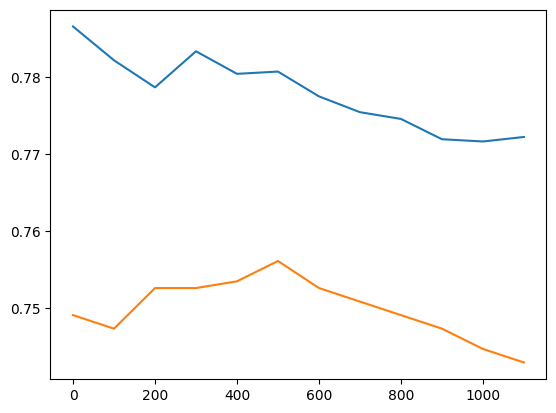

In [ ]:
sns.lineplot(x=np.arange(0.01,1200,100),y=train_score)
sns.lineplot(x=np.arange(0.01,1200,100),y=cv_score)


In [ ]:
best_la=0.01
cv_score[0]

0.7491228070175439

In [ ]:
model=LogisticRegression(C=1/best_la)
model.fit(X_train,Y_train)
model.score(X_cv,Y_cv)

0.7491228070175439

In [ ]:
model.score(X_test,Y_test)

0.7710526315789473

In [ ]:
df['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

#Neural Network

In [ ]:
 import tensorflow as tf
 from tensorflow import keras
 from tensorflow.keras import layers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Input,Activation,Flatten

In [ ]:
ann=Sequential()
ann.add(Input(X_train.shape[1],))

ann.add(Dense(128,activation='relu'))
ann.add(Dense(64,activation='relu'))
ann.add(Dense(32,activation='relu'))
ann.add(Dense(16,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(4,activation='relu'))
ann.add(Dense(2,activation='relu'))
#output layer
ann.add(Dense(1,activation='sigmoid'))

In [ ]:
ann.compile('adam',loss='binary_crossentropy',metrics='accuracy')
history=ann.fit(X_train,Y_train,epochs=100,batch_size=64,verbose=1,validation_split=0.15)

Epoch 1/100
46/46 [==============================] - 4s 11ms/step - loss: 0.6590 - accuracy: 0.6099 - val_loss: 0.5831 - val_accuracy: 0.7193
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 0.5641 - accuracy: 0.7970 - val_loss: 0.5012 - val_accuracy: 0.8635
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 0.4795 - accuracy: 0.8596 - val_loss: 0.3799 - val_accuracy: 0.8908
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 0.3333 - accuracy: 0.8772 - val_loss: 0.3200 - val_accuracy: 0.8577
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2618 - accuracy: 0.9068 - val_loss: 0.2766 - val_accuracy: 0.8869
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2131 - accuracy: 0.9274 - val_loss: 0.2561 - val_accuracy: 0.9006
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 0.1706 - accuracy: 0.9398 - val_loss: 0.2427 - val_accuracy: 0.9025
Epoch 8/100


In [ ]:
# At epoch 39,we get train loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1750 - val_accuracy: 0.9747
Y_pred=ann.predict(X_test)
for i in range(Y_pred.shape[0]):
  if Y_pred[i]<0.5:
    Y_pred[i]=0
  else:
    Y_pred[i]=1

36/36 [==============================] - 0s 6ms/step


In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(Y_test,Y_pred)

0.9570175438596491

#We get test accuracy as 95.7% and validation accuracy as 97.47 whereas simple log reg gives accuracy as 77%